<a href="https://colab.research.google.com/github/Homeash-github/Data-Analysis/blob/main/World_happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 05


In [56]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/World Happiness Dataset 2024.csv', encoding='latin-1')

In [57]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [58]:
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [59]:
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [60]:
country_means = data.groupby('Country name')['Log GDP per capita'].mean()
data['Log GDP per capita'].fillna(data['Country name'].map(country_means), inplace=True)

In [61]:
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    9
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [62]:
# data = data.dropna(subset=['Log GDP per capita'])
# data.isnull().sum()

In [63]:
from sklearn.impute import SimpleImputer, KNNImputer
country_averages = data[['Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity']].mean()
def impute_by_country(row):
  country = row['Country name']
  for col in ['Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity']:
    if pd.isna(row[col]):
      row[col] = country_averages[col]
  return row
data = data.apply(impute_by_country, axis=1)
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    9
Social support                       13
Healthy life expectancy at birth      0
Freedom to make life choices          0
Generosity                            0
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [64]:
features = data.drop(columns=['Country name'])
imputer = SimpleImputer(strategy='mean')
target_cols = features.columns
imputed_data = imputer.fit_transform(features[target_cols])
data = pd.concat([data.drop(columns=target_cols), pd.DataFrame(imputed_data, columns=target_cols)], axis=1)
data.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

Day 06

In [65]:
correlations = data[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()
print(round(correlations,2))

                                  Life Ladder  Log GDP per capita  \
Life Ladder                              1.00                0.78   
Log GDP per capita                       0.78                1.00   
Social support                           0.72                0.68   
Healthy life expectancy at birth         0.71                0.81   
Freedom to make life choices             0.54                0.36   
Generosity                               0.17               -0.00   
Perceptions of corruption               -0.42               -0.34   

                                  Social support  \
Life Ladder                                 0.72   
Log GDP per capita                          0.68   
Social support                              1.00   
Healthy life expectancy at birth            0.60   
Freedom to make life choices                0.40   
Generosity                                  0.06   
Perceptions of corruption                  -0.22   

                              

<Axes: >

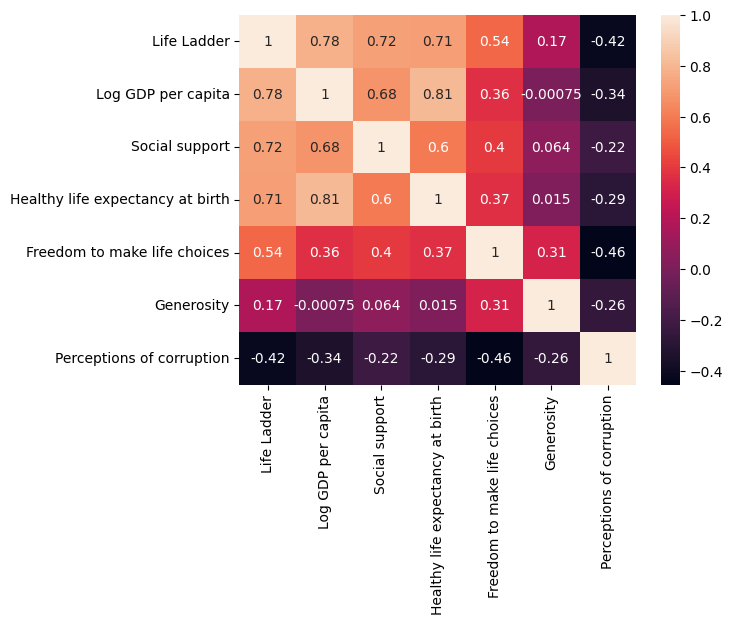

In [66]:
import seaborn as sns
sns.heatmap(correlations, annot=True)

Day 07

In [67]:
print("Correlation between India VS Pakistan")
countries1 = ['India', 'Pakistan']
filtered_data = data[data['Country name'].isin(countries1)]
correlations_c = filtered_data[['Life Ladder', 'Log GDP per capita', 'Social support']].corr()
print(correlations_c)

Correlation between India VS Pakistan
                    Life Ladder  Log GDP per capita  Social support
Life Ladder            1.000000           -0.689935        0.068967
Log GDP per capita    -0.689935            1.000000        0.172005
Social support         0.068967            0.172005        1.000000


In [68]:
countries2 = ['China', 'Japan']
filtered_data = data[data['Country name'].isin(countries2)]
correlations_c = filtered_data[['Life Ladder', 'Log GDP per capita', 'Social support']].corr()
print(correlations_c)

                    Life Ladder  Log GDP per capita  Social support
Life Ladder            1.000000            0.907512        0.838237
Log GDP per capita     0.907512            1.000000        0.897510
Social support         0.838237            0.897510        1.000000


In [69]:
country_stats = {}
for index, row in data.iterrows():
  country_name = row['Country name']
  life_ladder = row['Life Ladder']
  life_expectancy=row['Healthy life expectancy at birth']
  Gen = row['Generosity']
  Corruption = row['Perceptions of corruption']
  country_stats[country_name] = {'Life Ladder': life_ladder, 'Healthy life expectancy at birth': life_expectancy, 'Generosity': Gen, 'Perceptions of corruption': Corruption}



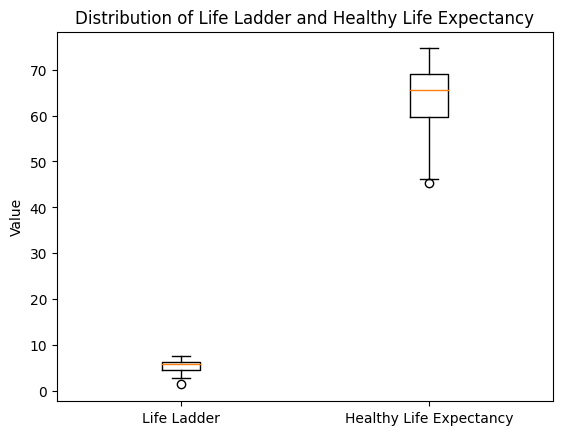

In [70]:
import matplotlib.pyplot as plt
life_ladder_values = [stats['Life Ladder'] for stats in country_stats.values()]
life_expectancy_values = [stats['Healthy life expectancy at birth'] for stats in country_stats.values()]
plt.boxplot([life_ladder_values, life_expectancy_values], labels=['Life Ladder', 'Healthy Life Expectancy'])
plt.ylabel('Value')
plt.title('Distribution of Life Ladder and Healthy Life Expectancy')
plt.show()

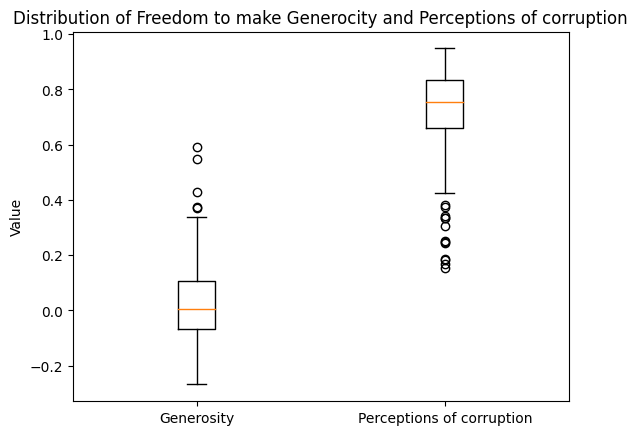

In [71]:
import matplotlib.pyplot as plt
Gen = [stats['Generosity'] for stats in country_stats.values()]
Corruption = [stats['Perceptions of corruption'] for stats in country_stats.values()]
plt.boxplot([Gen, Corruption], labels=['Generosity', 'Perceptions of corruption'])
plt.ylabel('Value')
plt.title('Distribution of Freedom to make Generocity and Perceptions of corruption')
plt.show()

Day 08


In [72]:
countries_of_interest = ['India', 'Sri Lanka', 'Nepal', 'Bangladesh']
filtered_data = data[data['Country name'].isin(countries_of_interest)]
average_life_ladder_per_year = filtered_data.groupby('year')['Life Ladder'].mean()
happiest_years = {}
for country in countries_of_interest:
  country_data = filtered_data[filtered_data['Country name'] == country]
  happiest_year = country_data.loc[country_data['Life Ladder'].idxmax(), 'year']
  happiest_years[country] = happiest_year


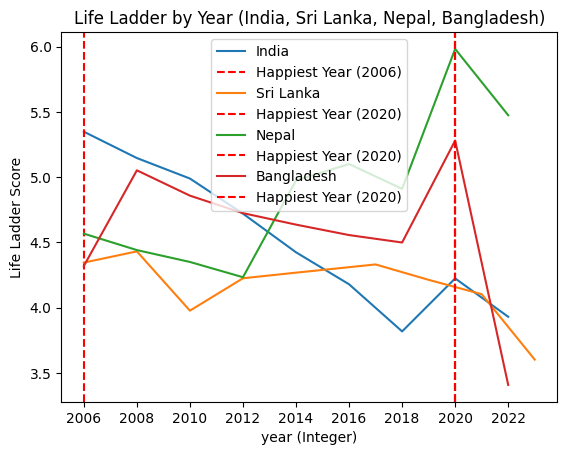

In [73]:
def get_years_with_gap(data, gap):
  """Filters and returns years with a gap of 'gap' years between them."""
  years = data['year'].unique()
  return years[::(gap+1)]
for country, year in happiest_years.items():
  country_data = filtered_data[filtered_data['Country name'] == country]
  years_to_plot = get_years_with_gap(country_data, gap=1)
  filtered_country_data = country_data[country_data['year'].isin(years_to_plot)]
  plt.plot(filtered_country_data['year'].astype(int), filtered_country_data['Life Ladder'], label=country)
  plt.axvline(x=int(year), color='r', linestyle='--', label=f'Happiest Year ({year.astype(int)})')
plt.xticks(filtered_country_data['year'].astype(int))
plt.xlabel('year (Integer)')
plt.ylabel('Life Ladder Score')
plt.title('Life Ladder by Year (India, Sri Lanka, Nepal, Bangladesh)')
plt.legend()
plt.show()

Day 09

In [74]:
average_corruption = data.groupby('Country name')['Perceptions of corruption'].mean()
top_10_highest = average_corruption.sort_values(ascending=False).head(10).reset_index()
top_10_highest.columns = ['Country name', 'Average Perception of Corruption']
top_10_lowest = average_corruption.sort_values().head(10).reset_index()
top_10_lowest.columns = ['Country name', 'Average Perception of Corruption']

print("Top 10 countries with highest average perception of corruption:")
print(top_10_highest.to_string(float_format='{:.3f}'.format))
print("\nTop 10 countries with lowest average perception of corruption:")
print(top_10_lowest.to_string(float_format='{:.3f}'.format))

Top 10 countries with highest average perception of corruption:
             Country name  Average Perception of Corruption
0                 Romania                             0.946
1  Bosnia and Herzegovina                             0.942
2                Bulgaria                             0.939
3     Trinidad and Tobago                             0.927
4                 Ukraine                             0.927
5                 Moldova                             0.924
6               Indonesia                             0.918
7                 Croatia                             0.918
8                Portugal                             0.914
9                Thailand                             0.908

Top 10 countries with lowest average perception of corruption:
                Country name  Average Perception of Corruption
0                  Singapore                             0.185
1                     Rwanda                             0.186
2                    De

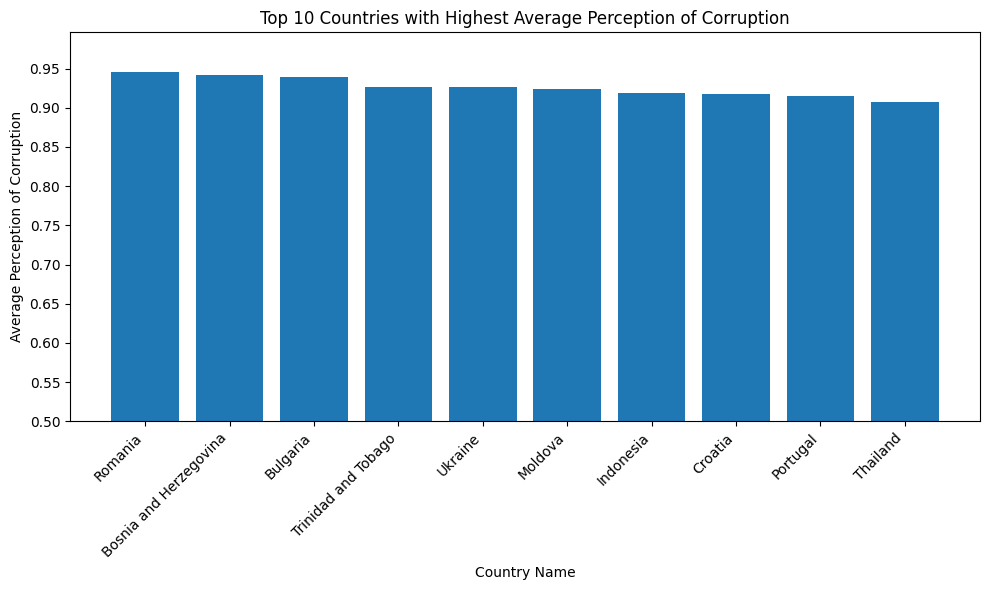

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_highest['Country name'], top_10_highest['Average Perception of Corruption'])
plt.xlabel('Country Name')
plt.ylabel('Average Perception of Corruption')
plt.title('Top 10 Countries with Highest Average Perception of Corruption')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, top_10_highest['Average Perception of Corruption'].max() + 0.05, 0.05))
plt.ylim(0.5, top_10_highest['Average Perception of Corruption'].max() + 0.05)  # Set y-axis limits
plt.tight_layout()
plt.show()

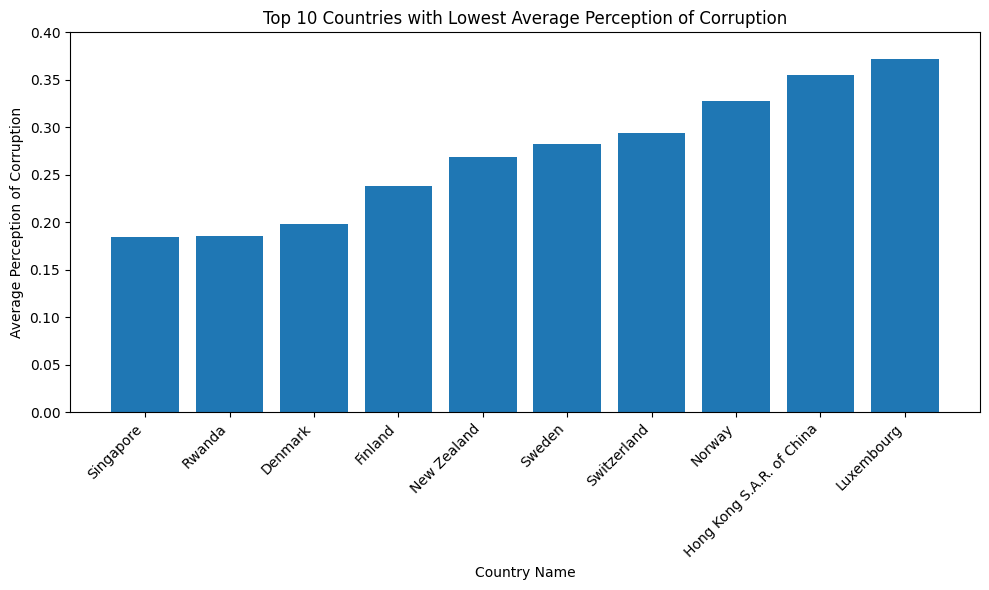

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_lowest['Country name'], top_10_lowest['Average Perception of Corruption'])
plt.xlabel('Country Name')
plt.ylabel('Average Perception of Corruption')
plt.title('Top 10 Countries with Lowest Average Perception of Corruption')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, top_10_lowest['Average Perception of Corruption'].max() + 0.05, 0.05)) # Set y-axis interval
plt.tight_layout()
plt.show()


Day 10

In [77]:
average_positive_affect = data['Positive affect'].mean()
average_negative_affect = data['Negative affect'].mean()
print(f"Average Positive Affect: {average_positive_affect:.2f}")
print(f"Average Negative Affect: {average_negative_affect:.2f}")

Average Positive Affect: 0.65
Average Negative Affect: 0.27


In [78]:
from sklearn.linear_model import LinearRegression
X = data[['Positive affect', 'Negative affect']]
y = data['Life Ladder']
model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
print(f"Coefficients: {coefficients}")
correlation02 = data[['Positive affect', 'Negative affect']].corr()
print(correlation02)

Coefficients: [ 4.74740028 -2.63302443]
                 Positive affect  Negative affect
Positive affect         1.000000        -0.333292
Negative affect        -0.333292         1.000000


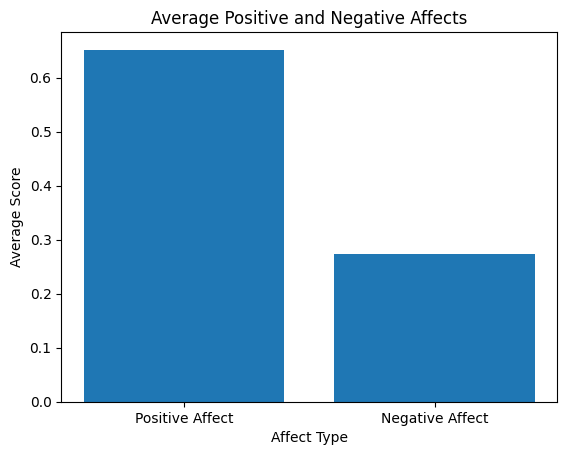

In [79]:
plt.bar(['Positive Affect', 'Negative Affect'], [average_positive_affect, average_negative_affect])
plt.xlabel('Affect Type')
plt.ylabel('Average Score')
plt.title('Average Positive and Negative Affects')
plt.show()